In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection

In [223]:
data = pd.read_csv('/kaggle/input/eeg-dataset-bf-mw/avg_psd_data_label.csv',header=None)

In [224]:
labels = ['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14','bin15','bin16','bin17','bin18','bin19','bin20','bin21','bfmw'];
data.columns = labels;

In [225]:
data.shape

(50, 22)

In [226]:
data

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,...,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bfmw
0,0.873900,0.774270,0.725501,0.707868,0.673764,0.638077,0.641941,0.668464,0.696521,0.720186,...,0.682218,0.706310,0.693437,0.583442,0.442173,0.342306,0.284518,0.251685,0.234216,1
1,0.623585,0.482525,0.401944,0.357796,0.333913,0.314741,0.291357,0.269786,0.254444,0.245943,...,0.476888,0.546801,0.530768,0.452378,0.349945,0.269541,0.230938,0.216160,0.206391,1
2,0.380975,0.339758,0.303394,0.287420,0.287852,0.285864,0.276791,0.269619,0.278739,0.325419,...,0.631441,0.647978,0.554904,0.396217,0.283918,0.240285,0.223052,0.212128,0.199103,1
3,0.431793,0.389440,0.381430,0.387898,0.396737,0.411699,0.451453,0.552994,0.727015,0.871294,...,1.610027,2.426303,2.863660,2.511776,1.699831,0.988563,0.584454,0.391507,0.290042,1
4,0.842653,0.757620,0.742956,0.756131,0.774476,0.822861,0.962340,1.321290,2.153625,3.430625,...,4.146111,3.018906,1.782797,0.962608,0.605513,0.476725,0.428431,0.417322,0.434208,1
5,0.352118,0.334204,0.354838,0.414815,0.475656,0.479029,0.427718,0.390886,0.429501,0.545978,...,0.700364,0.584584,0.443112,0.306350,0.189669,0.120705,0.094187,0.085208,0.079067,1
6,0.340585,0.309659,0.287474,0.267623,0.249141,0.237473,0.236312,0.249945,0.295856,0.403383,...,1.951645,2.874017,3.000627,2.152232,1.212052,0.708807,0.451250,0.284216,0.203693,1
7,0.579946,0.516827,0.467730,0.424221,0.387382,0.362357,0.341745,0.320240,0.294743,0.270556,...,0.330914,0.290533,0.231905,0.189621,0.164603,0.146332,0.133461,0.125909,0.117407,1
8,0.548158,0.504903,0.488278,0.473365,0.454648,0.440927,0.450492,0.507555,0.620990,0.791987,...,1.795306,2.344727,2.338997,1.597137,0.804046,0.433297,0.324471,0.272546,0.237439,1
9,0.214411,0.198817,0.187594,0.186772,0.193557,0.200303,0.204464,0.214205,0.256396,0.391210,...,1.018545,0.921071,0.733471,0.498297,0.285209,0.150324,0.083639,0.055869,0.045104,1


In [227]:
data.describe()

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,...,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bfmw
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.647141,0.569268,0.528144,0.515323,0.511448,0.507571,0.519583,0.569932,0.678989,0.874261,...,1.326410,1.249987,1.081736,0.854037,0.626827,0.444337,0.317457,0.244150,0.209345,1.500000
std,0.241935,0.210818,0.200205,0.207205,0.219071,0.236054,0.290534,0.395099,0.556764,0.842179,...,1.191778,0.989726,0.825019,0.713041,0.631279,0.475447,0.260925,0.128995,0.092954,0.505076
min,0.214411,0.198817,0.187594,0.186772,0.193557,0.186359,0.165062,0.150852,0.143652,0.137336,...,0.134974,0.136567,0.136361,0.138891,0.131717,0.115231,0.083639,0.055869,0.045104,1.000000
25%,0.442903,0.406868,0.391595,0.387519,0.372715,0.360241,0.349027,0.323857,0.298454,0.355728,...,0.547054,0.565939,0.483512,0.371279,0.284241,0.241018,0.216296,0.172287,0.148423,1.000000
50%,0.630210,0.538791,0.493606,0.471170,0.458571,0.444516,0.424379,0.462249,0.462652,0.533435,...,1.014932,0.887326,0.737922,0.571486,0.414835,0.309965,0.263496,0.231621,0.202503,1.500000
75%,0.819888,0.725983,0.666152,0.602080,0.602829,0.624840,0.582545,0.622323,0.760828,0.976767,...,1.760108,1.840516,1.745399,1.082046,0.665705,0.465868,0.370483,0.295133,0.237555,2.000000
max,1.349664,1.202497,1.159385,1.142795,1.089353,1.148345,1.492353,1.856211,2.374396,3.528697,...,6.332929,4.562995,3.051298,2.698531,3.148300,2.545827,1.454569,0.738779,0.448567,2.000000


In [228]:
data.isna().sum()

bin1     0
bin2     0
bin3     0
bin4     0
bin5     0
bin6     0
bin7     0
bin8     0
bin9     0
bin10    0
bin11    0
bin12    0
bin13    0
bin14    0
bin15    0
bin16    0
bin17    0
bin18    0
bin19    0
bin20    0
bin21    0
bfmw     0
dtype: int64

In [229]:
data.duplicated().sum()

0

In [230]:
(data == "?").sum()

bin1     0
bin2     0
bin3     0
bin4     0
bin5     0
bin6     0
bin7     0
bin8     0
bin9     0
bin10    0
bin11    0
bin12    0
bin13    0
bin14    0
bin15    0
bin16    0
bin17    0
bin18    0
bin19    0
bin20    0
bin21    0
bfmw     0
dtype: int64

In [231]:
data.nunique()

bin1     50
bin2     50
bin3     50
bin4     50
bin5     50
bin6     50
bin7     50
bin8     50
bin9     50
bin10    50
bin11    50
bin12    50
bin13    50
bin14    50
bin15    50
bin16    50
bin17    50
bin18    50
bin19    50
bin20    50
bin21    50
bfmw      2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


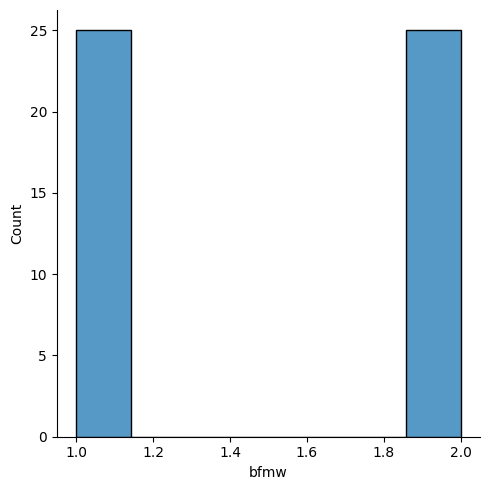

In [232]:
sns.displot(data["bfmw"])

array([[<Axes: title={'center': 'bin1'}>,
        <Axes: title={'center': 'bin2'}>,
        <Axes: title={'center': 'bin3'}>,
        <Axes: title={'center': 'bin4'}>,
        <Axes: title={'center': 'bin5'}>],
       [<Axes: title={'center': 'bin6'}>,
        <Axes: title={'center': 'bin7'}>,
        <Axes: title={'center': 'bin8'}>,
        <Axes: title={'center': 'bin9'}>,
        <Axes: title={'center': 'bin10'}>],
       [<Axes: title={'center': 'bin11'}>,
        <Axes: title={'center': 'bin12'}>,
        <Axes: title={'center': 'bin13'}>,
        <Axes: title={'center': 'bin14'}>,
        <Axes: title={'center': 'bin15'}>],
       [<Axes: title={'center': 'bin16'}>,
        <Axes: title={'center': 'bin17'}>,
        <Axes: title={'center': 'bin18'}>,
        <Axes: title={'center': 'bin19'}>,
        <Axes: title={'center': 'bin20'}>],
       [<Axes: title={'center': 'bin21'}>,
        <Axes: title={'center': 'bfmw'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

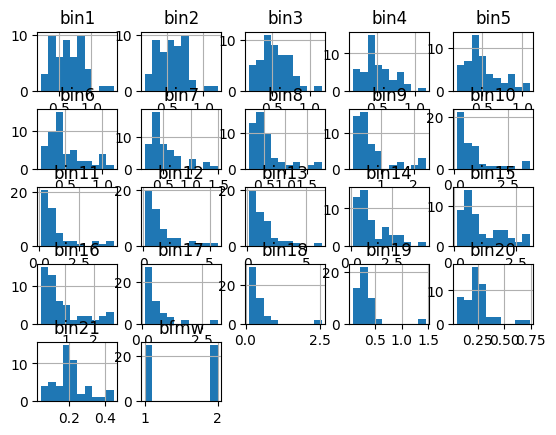

In [233]:
data.hist()

In [234]:
data.corr

<bound method DataFrame.corr of         bin1      bin2      bin3      bin4      bin5      bin6      bin7  \
0   0.873900  0.774270  0.725501  0.707868  0.673764  0.638077  0.641941   
1   0.623585  0.482525  0.401944  0.357796  0.333913  0.314741  0.291357   
2   0.380975  0.339758  0.303394  0.287420  0.287852  0.285864  0.276791   
3   0.431793  0.389440  0.381430  0.387898  0.396737  0.411699  0.451453   
4   0.842653  0.757620  0.742956  0.756131  0.774476  0.822861  0.962340   
5   0.352118  0.334204  0.354838  0.414815  0.475656  0.479029  0.427718   
6   0.340585  0.309659  0.287474  0.267623  0.249141  0.237473  0.236312   
7   0.579946  0.516827  0.467730  0.424221  0.387382  0.362357  0.341745   
8   0.548158  0.504903  0.488278  0.473365  0.454648  0.440927  0.450492   
9   0.214411  0.198817  0.187594  0.186772  0.193557  0.200303  0.204464   
10  0.373817  0.319303  0.275584  0.242062  0.212679  0.186359  0.165062   
11  0.657965  0.606004  0.596518  0.600116  0.607422  0.

<Axes: >

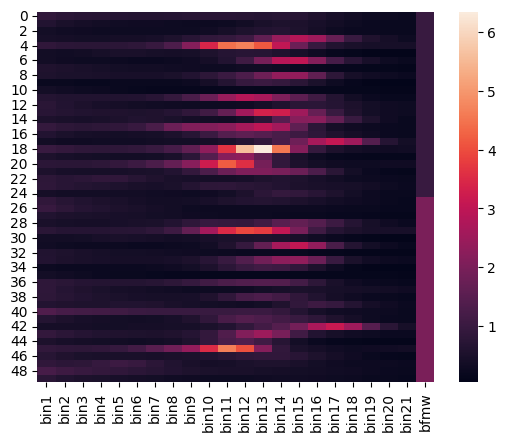

In [235]:
sns.heatmap(data)

In [236]:
X = data.iloc[:, :-1]  # First 21 columns (all rows, all but the last column)
y = data.iloc[:, -1]   # Last column (all rows)


In [237]:
X

,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,...,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21
0,0.873900,0.774270,0.725501,0.707868,0.673764,0.638077,0.641941,0.668464,0.696521,0.720186,...,0.695154,0.682218,0.706310,0.693437,0.583442,0.442173,0.342306,0.284518,0.251685,0.234216
1,0.623585,0.482525,0.401944,0.357796,0.333913,0.314741,0.291357,0.269786,0.254444,0.245943,...,0.355832,0.476888,0.546801,0.530768,0.452378,0.349945,0.269541,0.230938,0.216160,0.206391
2,0.380975,0.339758,0.303394,0.287420,0.287852,0.285864,0.276791,0.269619,0.278739,0.325419,...,0.543947,0.631441,0.647978,0.554904,0.396217,0.283918,0.240285,0.223052,0.212128,0.199103
3,0.431793,0.389440,0.381430,0.387898,0.396737,0.411699,0.451453,0.552994,0.727015,0.871294,...,1.060896,1.610027,2.426303,2.863660,2.511776,1.699831,0.988563,0.584454,0.391507,0.290042
4,0.842653,0.757620,0.742956,0.756131,0.774476,0.822861,0.962340,1.321290,2.153625,3.430625,...,4.685949,4.146111,3.018906,1.782797,0.962608,0.605513,0.476725,0.428431,0.417322,0.434208
5,0.352118,0.334204,0.354838,0.414815,0.475656,0.479029,0.427718,0.390886,0.429501,0.545978,...,0.731319,0.700364,0.584584,0.443112,0.306350,0.189669,0.120705,0.094187,0.085208,0.079067
6,0.340585,0.309659,0.287474,0.267623,0.249141,0.237473,0.236312,0.249945,0.295856,0.403383,...,1.093984,1.951645,2.874017,3.000627,2.152232,1.212052,0.708807,0.451250,0.284216,0.203693
7,0.579946,0.516827,0.467730,0.424221,0.387382,0.362357,0.341745,0.320240,0.294743,0.270556,...,0.317499,0.330914,0.290533,0.231905,0.189621,0.164603,0.146332,0.133461,0.125909,0.117407
8,0.548158,0.504903,0.488278,0.473365,0.454648,0.440927,0.450492,0.507555,0.620990,0.791987,...,1.308268,1.795306,2.344727,2.338997,1.597137,0.804046,0.433297,0.324471,0.272546,0.237439
9,0.214411,0.198817,0.187594,0.186772,0.193557,0.200303,0.204464,0.214205,0.256396,0.391210,...,0.930321,1.018545,0.921071,0.733471,0.498297,0.285209,0.150324,0.083639,0.055869,0.045104


In [238]:
X.shape

(50, 21)

In [239]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    2
44    2
45    2
46    2
47    2
48    2
49    2
Name: bfmw, dtype: int64

In [240]:
y.shape

(50,)

In [241]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state='42')
y_train

23    1
5     1
30    2
7     1
46    2
48    2
16    1
20    1
24    1
34    2
49    2
44    2
26    2
15    1
3     1
37    2
0     1
39    2
29    2
41    2
25    2
19    1
47    2
11    1
45    2
33    2
14    1
31    2
28    2
32    2
1     1
40    2
38    2
17    1
18    1
10    1
27    2
12    1
9     1
22    1
Name: bfmw, dtype: int64

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
model = LogisticRegression(max_iter=15000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=15000)

In [244]:
predictions = model.predict(X_test)

In [245]:
predictions

array([2, 2, 2, 1, 1, 2, 1, 1, 1, 2])

In [246]:
y_test

2     1
43    2
36    2
42    2
13    1
8     1
21    1
4     1
6     1
35    2
Name: bfmw, dtype: int64

In [247]:
y_actual = y_test
cv_preds = model.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_actual,cv_preds, average = 'macro')

0.6969696969696968

In [248]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy*100

70.0